In [605]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [543]:
CSV_FILE_NAME = 'fifa21_male2.csv'

# ---------------------------color map------------------------ #
cmap = plt.get_cmap('Accent')
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

In [544]:
df = pd.read_csv(CSV_FILE_NAME, low_memory=False)

### Dataset Info

In [545]:
print(f"* Column count: {len(df.columns)}")
print(f"* Rows   count: {len(df)}")
print(f"* Nulls  count: {df['BP'].isnull().sum()}")
print(f"* Column types: {set(df.dtypes)}")

* Column count: 107
* Rows   count: 17125
* Nulls  count: 0
* Column types: {dtype('int64'), dtype('O'), dtype('float64')}


### Preprocessing

* #### Heigh - pass feets to cms

In [546]:
def ft_to_cm(meassure):    
    """
    Recives a messure with the following format:
    F'I" where F is the total foots and I are
    the total inches.
    Ex: 5'9" (5 foots and 9 inches)
    """
    FOOT_TO_CM_PROPORTION = 30.48
    INCH_TO_CM_PROPORTION = 2.54

    split = meassure.split("'")
    foots = int(split[0])
    inches = int(split[1][:-1])
    
    height_in_cm = foots * FOOT_TO_CM_PROPORTION +\
                   inches * INCH_TO_CM_PROPORTION
    
    return round(height_in_cm, 2)

heights_in_cm = df.apply(lambda r: ft_to_cm(r['Height']), axis=1)
df['Height'] = heights_in_cm

* #### Weight - pass libras to kilograms

In [547]:
def lb_to_kg(meassure):    
    """
    Recives a messure with the following format:
    Nlbs where N is the weigth in libras
    Ex: 159lbs
    """
    LB_TO_KG_PROPORTION = 0.453592
    
    split = meassure.split("lbs")
    lbs = int(split[0])
    
    weight_in_kg = lbs * LB_TO_KG_PROPORTION
    
    return round(weight_in_kg, 2)

weights_in_kg = df.apply(lambda r: lb_to_kg(r['Weight']), axis=1)
df['Weight'] = weights_in_kg

* #### Hits - transform to integer

In [548]:
def hit_to_int(hit):
    multiplier = 1.0

    if 'K' in hit:
        hit = hit.split('K')[0]
        multiplier = 1000.0
    
    if 'k' in hit:
        hit = hit.split('k')[0]
        multiplier = 1000.0
    
   
    return float(hit) * multiplier
    
hits_as_numeric = df.apply(lambda r: hit_to_int(r['Hits']), axis=1)
df['Hits'] = hits_as_numeric 

### Class distribution

In [549]:
print('* Classes: ', end='')
for position in set(df['BP']):
    print(position, end=', ')

* Classes: LW, LM, CF, LWB, GK, CDM, LB, RW, CAM, ST, RWB, CB, CM, RB, RM, 

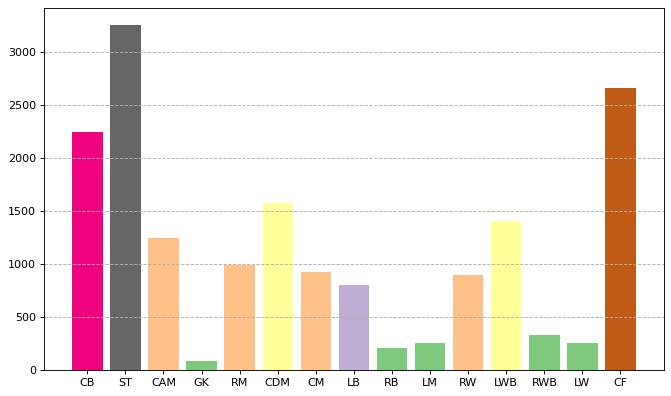

In [550]:
best_positions_count = df['BP'].value_counts()

labels = best_positions_count.keys()
bar_heights = (best_position_count.values).T.flatten()

cmap = plt.get_cmap('Accent')
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.figure(figsize=(10,6), dpi=80)
plt.grid(axis='y', linestyle='--')

plt.bar(labels, bar_heights, width=0.8, color=cmap(rescale(heigths)))
plt.show()

### Attack prop heatmap by position

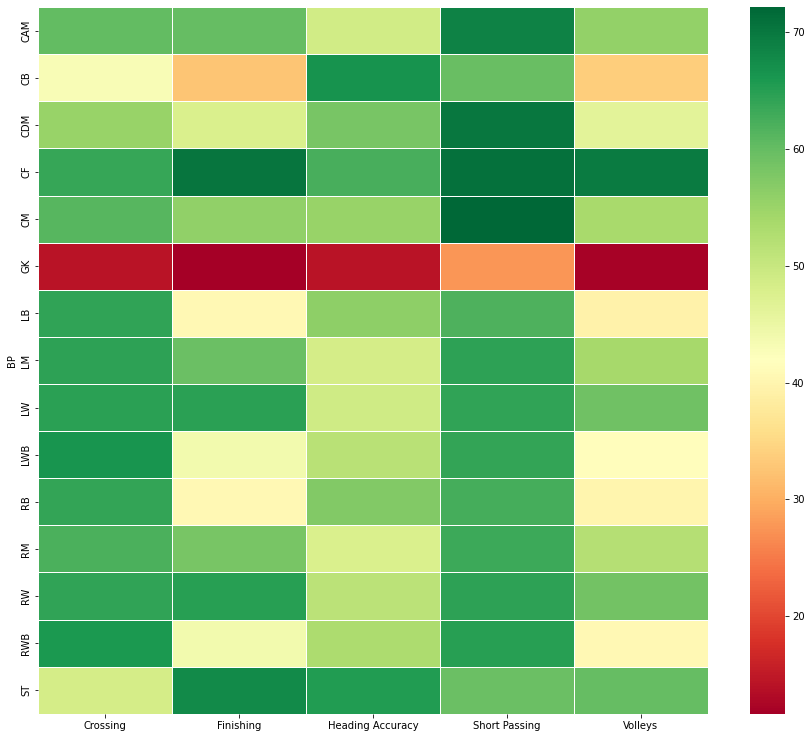

In [633]:
attack_props =  ['Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys']
positions = set(df['BP'])

props_avg = df[['BP'] + attack_props].groupby('BP').agg(lambda x: round(x.mean(),2));
data = np.array(props_avg)

plt.figure(figsize=(15,13))
sns.heatmap(props_avg, cmap='RdYlGn', linewidths=0.5)
plt.show()

### Height average by position

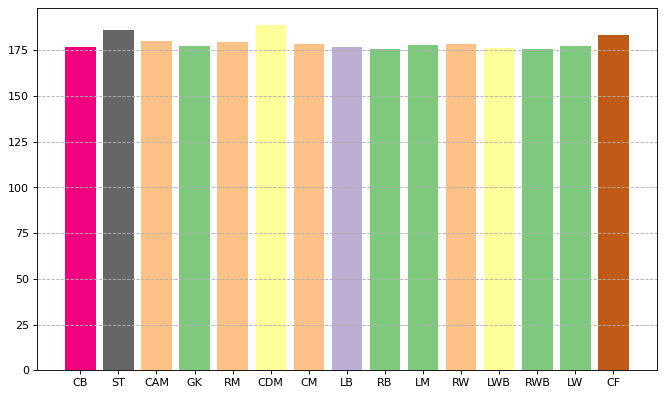

In [551]:
height_avg_by_bp = df[['BP', 'Height']].groupby('BP').mean()

labels = best_positions_count.keys()
bar_heights = (height_avg_by_bp.values).T.flatten()

cmap = plt.get_cmap('Accent')
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.figure(figsize=(10,6), dpi=80)
plt.grid(axis='y', linestyle='--')

plt.bar(labels, bar_heights, width=0.8, color=cmap(rescale(heigths)))
plt.show()


### Weigth average by position

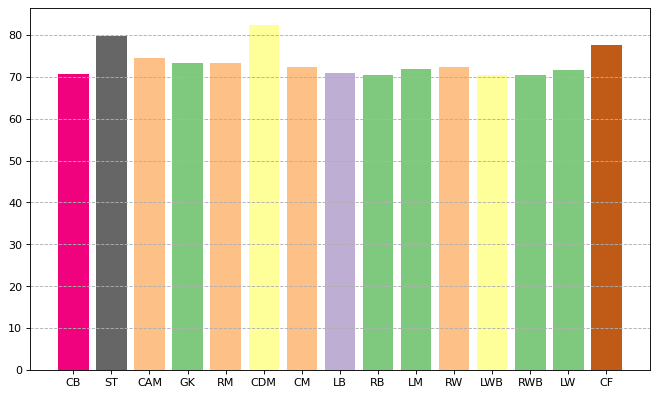

In [552]:
weight_avg_by_bp = df[['BP', 'Weight']].groupby('BP').mean()

labels = best_positions_count.keys()
bar_heights = (weight_avg_by_bp.values).T.flatten()

cmap = plt.get_cmap('Accent')
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.figure(figsize=(10,6), dpi=80)
plt.grid(axis='y', linestyle='--')

plt.bar(labels, bar_heights, width=0.8, color=cmap(rescale(heigths)))
plt.show()


### Avigilty averge by position

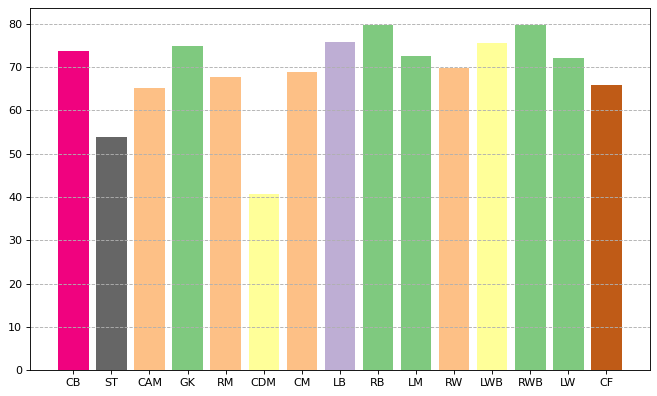

In [553]:
agility_avg_by_bp = df[['BP', 'Agility']].groupby('BP').mean()

labels = best_positions_count.keys()
bar_heights = (agility_avg_by_bp.values).T.flatten()

cmap = plt.get_cmap('Accent')
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.figure(figsize=(10,6), dpi=80)
plt.grid(axis='y', linestyle='--')

plt.bar(labels, bar_heights, width=0.8, color=cmap(rescale(heigths)))
plt.show()

### Hits average by position

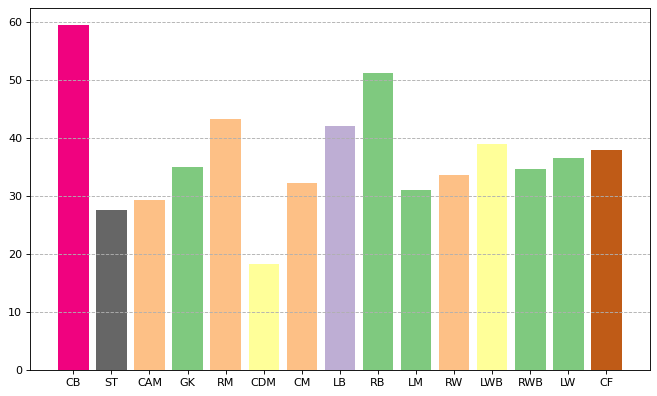

In [557]:
hits_avg_by_bp = df[['BP', 'Hits']].groupby('BP').mean()

labels = best_positions_count.keys()
bar_heights = (hits_avg_by_bp.values).T.flatten()

cmap = plt.get_cmap('Accent')
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.figure(figsize=(10,6), dpi=80)
plt.grid(axis='y', linestyle='--')

plt.bar(labels, bar_heights, width=0.8, color=cmap(rescale(heigths)))
plt.show()